**Instructor**: Prof. Keith Chugg (chugg@usc.edu)

**Teaching Assistant**: Alexios Rustom (arustom@usc.edu)

**Notebooks**: Written by Alexios Rustom (arustom@usc.edu) and based on [Blog](https://xavierbourretsicotte.github.io/Kernel_feature_map.html)

# Kernel Methods

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm

In [3]:
def feature_map_1(X):
    return np.asarray((X[:, 0], X[:, 1], X[:, 0]**2 + X[:, 1]**2)).T

In [4]:
def feature_map_2(X):
    return np.asarray((X[:, 0], X[:, 1], np.exp(-(X[:, 0]**2 + X[:, 1]**2)))).T

In [5]:
def feature_map_3(X):
    return np.asarray((np.sqrt(2) * X[:, 0] * X[:, 1], X[:, 0]**2, X[:, 1]**2)).T

In [6]:
X, y = make_circles(500, factor=.1, noise=.1)

In [7]:
Z1 = feature_map_1(X)
Z2 = feature_map_2(X)
Z3 = feature_map_3(X)

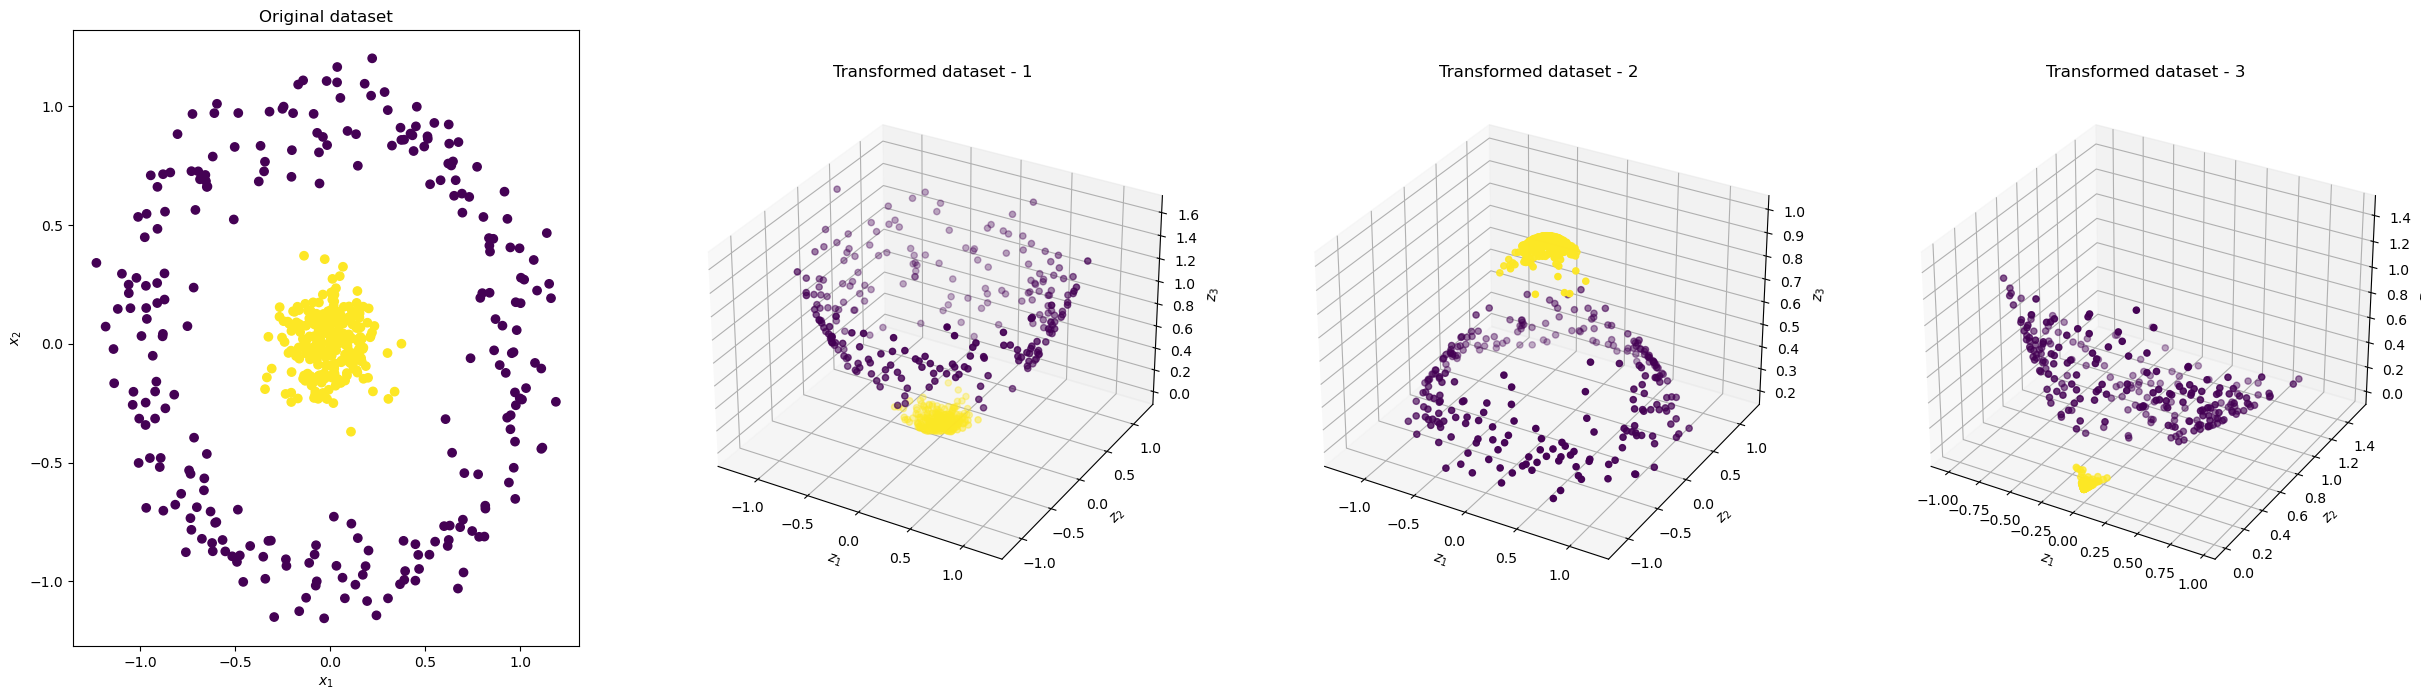

In [8]:
fig = plt.figure(figsize=(30, 8))

ax = fig.add_subplot(1, 4, 1)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Original dataset')

ax = fig.add_subplot(1, 4, 2, projection='3d')
ax.scatter3D(Z1[:, 0], Z1[:, 1], Z1[:, 2], c=y, cmap='viridis')
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')
ax.set_zlabel('$z_3$')
ax.set_title('Transformed dataset - 1')

ax = fig.add_subplot(1, 4, 3, projection='3d')
ax.scatter3D(Z2[:, 0], Z2[:, 1], Z2[:, 2], c=y, cmap='viridis')
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')
ax.set_zlabel('$z_3$')
ax.set_title('Transformed dataset - 2')

ax = fig.add_subplot(1, 4, 4, projection='3d')
ax.scatter3D(Z3[:, 0], Z3[:, 1], Z3[:, 2], c=y, cmap='viridis')
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')
ax.set_zlabel('$z_3$')
ax.set_title('Transformed dataset - 3')

plt.show()


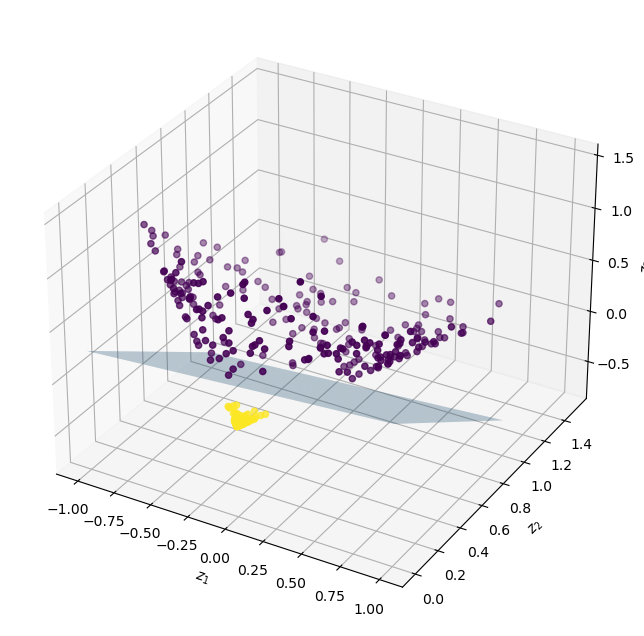

In [10]:
clf = svm.SVC(C = 1, kernel = 'linear')
clf.fit(Z3, y)

w = clf.coef_.flatten()
b = clf.intercept_.flatten()

xx, yy = np.meshgrid(np.linspace(-1,1), np.linspace(0,1))

xx, yy = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(0, 1, 100))

#w_0*x + w_1*y +w_2*z +b =0
boundary = (-w[0] * xx - w[1] * yy - b) * 1. / w[2]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Z3[:, 0], Z3[:, 1], Z3[:, 2], c=y, cmap='viridis')


ax.plot_surface(xx, yy, boundary, alpha=0.3)

ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')
ax.set_zlabel('$z_3$')

plt.show()

In [11]:
def my_kernel(X,Y):
    return np.dot(feature_map_3(X),feature_map_3(Y).T )

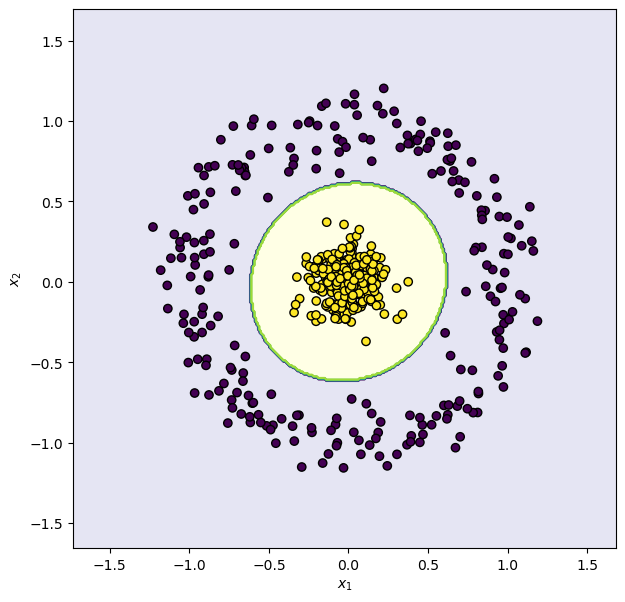

In [12]:
clf = svm.SVC(kernel=my_kernel, C = 1)
clf.fit(X, y)

h = .01
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize = (7,7))
plt.contourf(xx, yy, Z,1, colors = ['darkblue','yellow'], alpha = .1)
plt.contour(xx, yy, Z, cmap = 'viridis')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors = 'k')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()